## Figures

In this notebook we create the figures that illustrate our results.

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import pauli_basis
import umap
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm 
from qiskit.opflow import StateFn
from qiskit.opflow import Z,X,Y
from qiskit.quantum_info import Pauli
from qiskit.opflow import *
from qiskit.circuit.library import Diagonal
from qiskit.extensions import  UnitaryGate
from qiskit import QuantumCircuit,execute
from qiskit import BasicAer
from qiskit.compiler import transpile
from sklearn.model_selection import train_test_split
from qiskit.quantum_info import Statevector
from scipy.stats import unitary_group
from qiskit import IBMQ, Aer
from matplotlib.patches import Rectangle
#from mpl_toolkits.axes_grid.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable

from os import listdir
from os.path import isfile, join
from sklearn.linear_model import Ridge
import random 
import pandas as pd
import pickle

warnings.filterwarnings('ignore')

## Performance results

In this section we evaluate the performance of the quantum reservoirs for different types of noise and number of gates of the circuit. We compare the results with the noiseless simulation.

## Amplitude damping, depolarizing and phase damping channels

In [3]:
results_AD = pd.read_csv('../results/mse_amplitude_damping.csv', index_col=0)
results_DP = pd.read_csv('../results/mse_depolarizing.csv', index_col=0)
results_PD = pd.read_csv('../results/mse_phase_damping.csv', index_col=0)

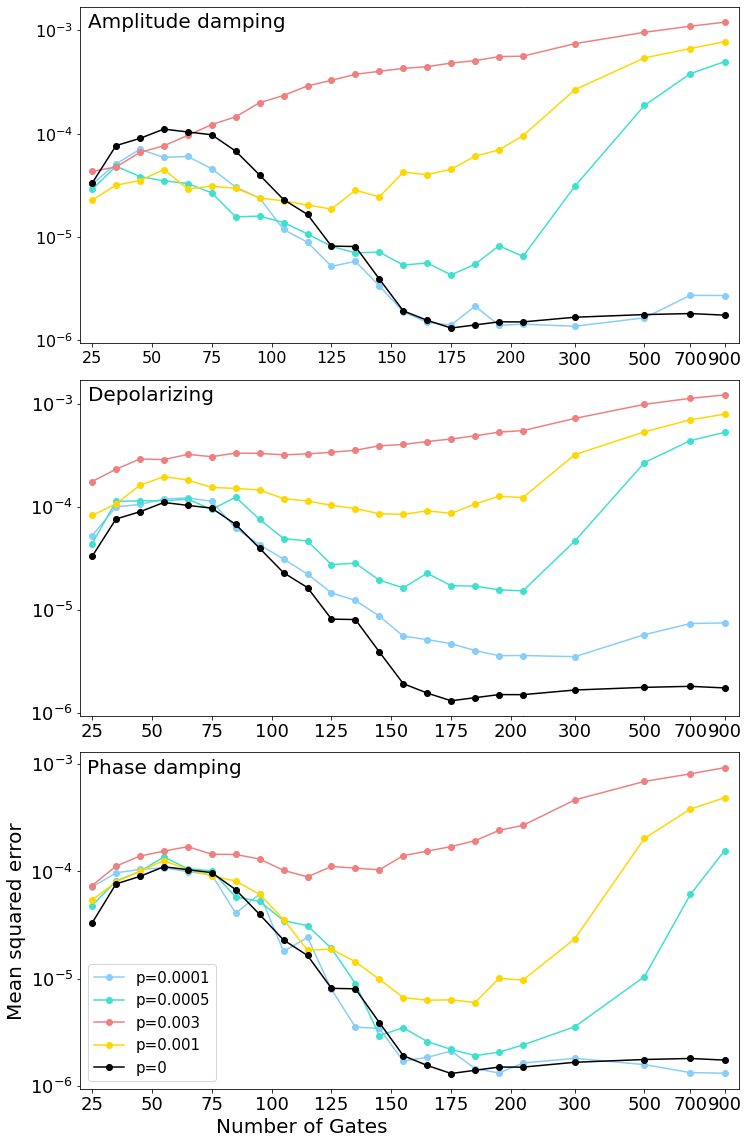

In [25]:
from matplotlib.patches import Rectangle
#from mpl_toolkits.axes_grid.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable

x = [25,35,45,55,65,75,85,95,105,115,125,135,145,155,165,175,185,195,205,300,500,700,900]
colors = ['lightskyblue', 'lightcoral', 'turquoise', 'black', 'gold', 'black', 'lightgreen', 'mediumpurple']


fig, (ax1, ax3, ax5) = plt.subplots(3, 1,figsize = (10.5, 16))


# AMPLITUDE DAMPING
mses_AD_0001 = results_AD['MSE1'][['AD_0001_'+ str(n) for n in x]]
mses_AD_0005 = results_AD['MSE1'][['AD_0005_'+ str(n) for n in x]]
mses_AD_003 = results_AD['MSE1'][['AD_003_'+ str(n) for n in x]]
mses_AD_001 = results_AD['MSE1'][['AD_001_'+ str(n) for n in x]]
mses_AD_0 = results_AD['MSE1'][['AD_0_'+ str(n) for n in x]]

ax1.plot(x, mses_AD_0001, marker='o', color = colors[0], label ='p=0.0001')
ax1.plot(x, mses_AD_0005, marker='o', color = colors[2], label ='p=0.0005')
ax1.plot(x, mses_AD_003, marker='o', color = colors[1], label ='p=0.003')
ax1.plot(x, mses_AD_001, marker='o', color = colors[4], label ='p=0.001')
ax1.plot(x, mses_AD_0, marker='o', color = colors[5], label ='p=0')
ax1.set_yscale('log')
ax1.set_xscale('linear')
ax1.set_xlim((20,205))
#ax1.xaxis.set_visible(False)
ax1.set_title('Amplitude damping',  x=0.24, y=0.92, fontsize=20)
ax1.tick_params(axis='both', which='major', labelsize=16)

divider = make_axes_locatable(ax1)
ax2 = divider.append_axes("right", size=3, pad=0, sharey=ax1)
ax2.set_xscale('log')
ax2.set_xlim((205,1000))
ax2.spines['left'].set_visible(False)
ax2.yaxis.set_visible(False)
ax2.set_xticks([300,500,700,900], ['300','500','700', '900'], minor=False, fontsize=18)
plt.minorticks_off()

ax2.plot(x, mses_AD_0001, marker='o', color = colors[0], label ='p=0.0001')
ax2.plot(x, mses_AD_0005, marker='o', color = colors[2], label ='p=0.0005')
ax2.plot(x, mses_AD_003, marker='o', color = colors[1], label ='p=0.003')
ax2.plot(x, mses_AD_001, marker='o', color = colors[4], label ='p=0.001')
ax2.plot(x, mses_AD_0, marker='o', color = colors[5], label ='p=0')


#DEPOLARIZING
mses_DP_0001 = results_DP['MSE1'][['DP_0001_'+ str(n) for n in x]]
mses_DP_0005 = results_DP['MSE1'][['DP_0005_'+ str(n) for n in x]]
mses_DP_003 = results_DP['MSE1'][['DP_003_'+ str(n) for n in x]]
mses_DP_001 = results_DP['MSE1'][['DP_001_'+ str(n) for n in x]]
mses_DP_0 = results_DP['MSE1'][['DP_0_'+ str(n) for n in x]]

ax3.plot(x, mses_DP_0001, marker='o', color = colors[0], label ='DP 0.0001')
ax3.plot(x, mses_DP_0005, marker='o', color = colors[2], label ='DP 0.0005')
ax3.plot(x, mses_DP_003, marker='o', color = colors[1], label ='DP 0.003')
ax3.plot(x, mses_DP_001, marker='o', color = colors[4], label ='DP 0.001')
ax3.plot(x, mses_DP_0, marker='o', color = colors[5], label ='DP 0')
ax3.set_yscale('log')
ax3.set_xscale('linear')
ax3.set_xlim((20,205))
ax3.set_title('Depolarizing',  x=0.16, y=0.92, fontsize=20)
ax3.tick_params(axis='both', which='major', labelsize=18)

divider = make_axes_locatable(ax3)
ax4 = divider.append_axes("right", size=3, pad=0, sharey=ax3)
ax4.set_xscale('log')
ax4.set_xlim((205,1000))
ax4.spines['left'].set_visible(False)
ax4.yaxis.set_visible(False)
ax4.set_xticks([300,500,700,900], ['300','500','700', '900'], minor=False, fontsize=18)
plt.minorticks_off()

ax4.plot(x, mses_DP_0001, marker='o', color = colors[0], label ='DP 0.0001')
ax4.plot(x, mses_DP_0005, marker='o', color = colors[2], label ='DP 0.0005')
ax4.plot(x, mses_DP_003, marker='o', color = colors[1], label ='DP 0.003')
ax4.plot(x, mses_DP_001, marker='o', color = colors[4], label ='DP 0.001')
ax4.plot(x, mses_DP_0, marker='o', color = colors[5], label ='DP 0')

#PHASE DAMPING
mses_PD_0001 = results_PD['MSE1'][['PD_0001_'+ str(n) for n in x]]
mses_PD_0005 = results_PD['MSE1'][['PD_0005_'+ str(n) for n in x]]
mses_PD_003 = results_PD['MSE1'][['PD_003_'+ str(n) for n in x]]
mses_PD_001 = results_PD['MSE1'][['PD_001_'+ str(n) for n in x]]
mses_PD_0 = results_PD['MSE1'][['PD_0_'+ str(n) for n in x]]

ax5.plot(x, mses_PD_0001, marker='o', color = colors[0], label ='p=0.0001')
ax5.plot(x, mses_PD_0005, marker='o', color = colors[2], label ='p=0.0005')
ax5.plot(x, mses_PD_003, marker='o', color = colors[1], label ='p=0.003')
ax5.plot(x, mses_PD_001, marker='o', color = colors[4], label ='p=0.001')
ax5.plot(x, mses_PD_0, marker='o', color = colors[5], label ='p=0')
ax5.set_yscale('log')
ax5.set_xscale('linear')
ax5.set_xlim((20,205))
ax5.set_xlabel('Number of Gates',fontsize=20)
ax5.set_ylabel('Mean squared error',fontsize=20)
ax5.set_title('Phase damping', x=0.19, y=0.92, fontsize=20)
ax5.tick_params(axis='both', which='major', labelsize=18)
ax5.legend(fontsize=15)

divider = make_axes_locatable(ax5)
ax6 = divider.append_axes("right", size=3, pad=0, sharey=ax5)
ax6.set_xscale('log')
ax6.set_xlim((205,1000))
ax6.spines['left'].set_visible(False)
ax6.yaxis.set_visible(False)
ax6.set_xticks([300,500,700,900], ['300','500','700', '900'], minor=False, fontsize=18)
plt.minorticks_off()

ax6.plot(x, mses_PD_0001, marker='o', color = colors[0], label ='p = 0.0001')
ax6.plot(x, mses_PD_0005, marker='o', color = colors[2], label ='p = 0.0005')
ax6.plot(x, mses_PD_003, marker='o', color = colors[1], label ='p = 0.003')
ax6.plot(x, mses_PD_001, marker='o', color = colors[4], label ='p = 0.001')
ax6.plot(x, mses_PD_0, marker='o', color = colors[5], label ='p = 0')


fig.tight_layout()
plt.savefig('../figures/mses.png', format='png')
plt.show()

The behaviour of the three noise models is very different. The amplitude damping channel, when both the number of gates and error probability are small enough, the noisy quantum reservoirs provide better performance than the noiseless reservoir, which means that the presence of noise is *beneficial* for the performance of the algorithm. The behavior of the depolarizing channel and the phase damping channel is significantly different than the amplitude damping channel. In these cases the performance of the noiseless reservoirs is always better than the performance of the noisy reservoirs, even when the error probability is small.

## Fidelity results

Now we analyze the fidelity between the noiseless final states $|\psi>$ and the noisy final states $\rho$ for the different error models.

In [6]:
results_fidelity_AD = pd.read_csv('../results/fidelity_amplitude_damping.csv', index_col=0)
results_fidelity_DP = pd.read_csv('../results/fidelity_depolarizing.csv', index_col=0)
results_fidelity_PD = pd.read_csv('../results/fidelity_phase_damping.csv', index_col=0)

### Average fidelity on the first 200 gates

In [7]:
x = [25,35,45,55,65,75,85,95,105,115,125,135,145,155,165,175,185,195,205]
fidelity_AD_0001 = np.mean(results_fidelity_AD['fidelity'][['AD_0001_'+ str(n) for n in x]])
fidelity_AD_0005 = np.mean(results_fidelity_AD['fidelity'][['AD_0005_'+ str(n) for n in x]])
fidelity_AD_003 = np.mean(results_fidelity_AD['fidelity'][['AD_003_'+ str(n) for n in x]])
fidelity_AD_001 = np.mean(results_fidelity_AD['fidelity'][['AD_001_'+ str(n) for n in x]])

fidelity_DP_0001 = np.mean(results_fidelity_DP['fidelity'][['DP_0001_'+ str(n) for n in x]])
fidelity_DP_0005 = np.mean(results_fidelity_DP['fidelity'][['DP_0005_'+ str(n) for n in x]])
fidelity_DP_003 = np.mean(results_fidelity_DP['fidelity'][['DP_003_'+ str(n) for n in x]])
fidelity_DP_001 = np.mean(results_fidelity_DP['fidelity'][['DP_001_'+ str(n) for n in x]])

fidelity_PD_0001 = np.mean(results_fidelity_PD['fidelity'][['PD_0001_'+ str(n) for n in x]])
fidelity_PD_0005 = np.mean(results_fidelity_PD['fidelity'][['PD_0005_'+ str(n) for n in x]])
fidelity_PD_003 = np.mean(results_fidelity_PD['fidelity'][['PD_003_'+ str(n) for n in x]])
fidelity_PD_001 = np.mean(results_fidelity_PD['fidelity'][['PD_001_'+ str(n) for n in x]])

In [8]:
print('Fidelity Amplitude Damping: 0.0001 = %0.3f, 0.0005=%0.3f, 0.001=%0.3f, 0.003=%0.3f'% (fidelity_AD_0001,
                                                                                      fidelity_AD_0005,fidelity_AD_001,fidelity_AD_003))

print('Fidelity Depolarizing: 0.0001 = %0.3f, 0.0005=%0.3f, 0.001=%0.3f, 0.003=%0.3f'% (fidelity_DP_0001,
                                                                                      fidelity_DP_0005,fidelity_DP_001,fidelity_DP_003))

print('Fidelity Phase Damping: 0.0001 = %0.3f, 0.0005=%0.3f, 0.001=%0.3f, 0.003=%0.3f'% (fidelity_PD_0001,
                                                                                      fidelity_PD_0005,fidelity_PD_001,fidelity_PD_003))

Fidelity Amplitude Damping: 0.0001 = 0.995, 0.0005=0.975, 0.001=0.951, 0.003=0.862
Fidelity Depolarizing: 0.0001 = 0.994, 0.0005=0.971, 0.001=0.944, 0.003=0.842
Fidelity Phase Damping: 0.0001 = 0.998, 0.0005=0.988, 0.001=0.976, 0.003=0.931


The depolarizing channel decreases faster the state fidelity than the phase damping channel. This explains why the performance of the quantum reservoirs decreases faster with the depolarizing noise.

### Minimum fidelity for improving the noiseless performance

In [9]:
fidelity_AD_0001_min = (results_fidelity_AD['fidelity'][['AD_0001_215']].values)[0]
fidelity_AD_0005_min = (results_fidelity_AD['fidelity'][['AD_0005_155']].values)[0]
fidelity_AD_003_min = (results_fidelity_AD['fidelity'][['AD_003_35']].values)[0]
fidelity_AD_001_min = (results_fidelity_AD['fidelity'][['AD_001_105']].values)[0]

In [10]:
print('Fidelity Amplitude Damping: 0.001 = %0.3f, 0.0005=%0.3f, 0.001=%0.3f, 0.003=%0.3f'% (
                       fidelity_AD_0001_min, fidelity_AD_0005_min,fidelity_AD_001_min,fidelity_AD_003_min))


Fidelity Amplitude Damping: 0.001 = 0.990, 0.0005=0.965, 0.001=0.956, 0.003=0.962


Thus, the quantum reservoirs with amplitude damping noise and a state fidelity of at least 0.96 provide better performance than the noiseless reservoirs.

### Fidelity plot

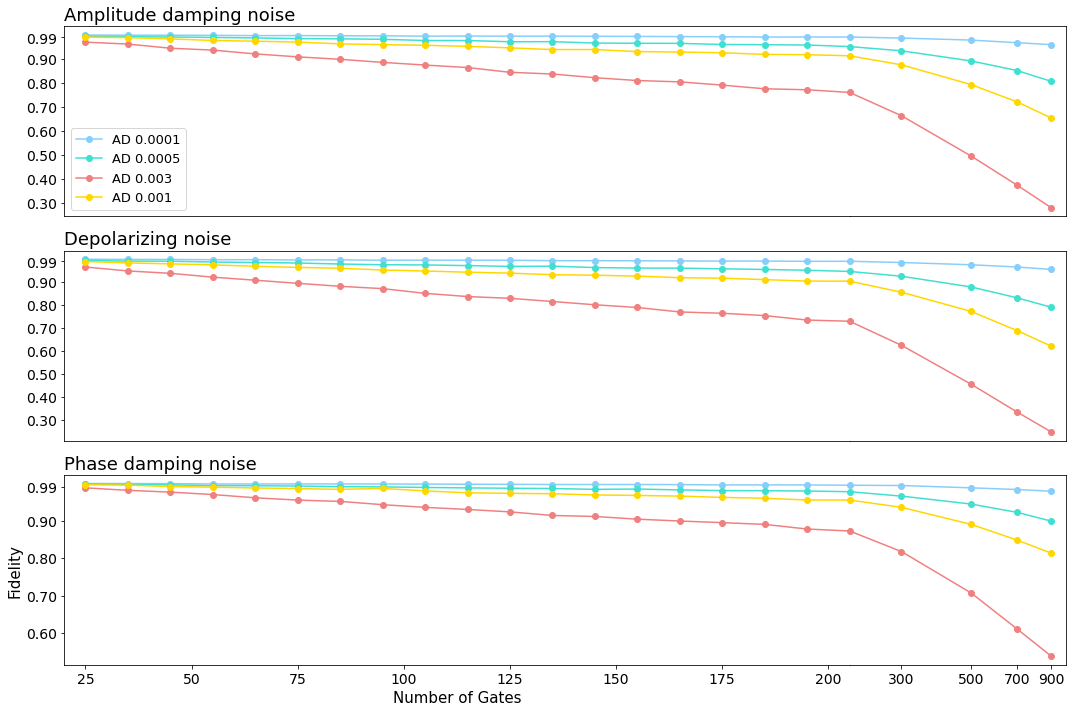

In [11]:
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable

x = [25,35,45,55,65,75,85,95,105,115,125,135,145,155,165,175,185,195,205,300,500,700,900]
colors = ['lightskyblue', 'lightcoral', 'turquoise', 'black', 'gold', 'black', 'lightgreen', 'mediumpurple']


fig, (ax1, ax3, ax5) = plt.subplots(3, 1,figsize = (15,10))


# AMPLITUDE DAMPING
mses_AD_0001 = results_fidelity_AD['fidelity'][['AD_0001_'+ str(n) for n in x]]
mses_AD_0005 = results_fidelity_AD['fidelity'][['AD_0005_'+ str(n) for n in x]]
mses_AD_003 = results_fidelity_AD['fidelity'][['AD_003_'+ str(n) for n in x]]
mses_AD_001 = results_fidelity_AD['fidelity'][['AD_001_'+ str(n) for n in x]]

ax1.plot(x, mses_AD_0001, marker='o', color = colors[0], label ='AD 0.0001')
ax1.plot(x, mses_AD_0005, marker='o', color = colors[2], label ='AD 0.0005')
ax1.plot(x, mses_AD_003, marker='o', color = colors[1], label ='AD 0.003')
ax1.plot(x, mses_AD_001, marker='o', color = colors[4], label ='AD 0.001')
ax1.set_yticks([0.99, 0.90, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3,0.2],labelsize=25)
ax1.set_xscale('linear')
ax1.set_xlim((20,205))
ax1.xaxis.set_visible(False)
ax1.set_title('Amplitude damping noise', loc='left', fontsize=18)
ax1.legend(fontsize=13)
ax1.tick_params(axis='both', which='major', labelsize=14)

divider = make_axes_locatable(ax1)
ax2 = divider.append_axes("right", size=3, pad=0, sharey=ax1)
ax2.set_xscale('log')
ax2.set_xlim((205,1000))
ax2.spines['left'].set_visible(False)
ax2.yaxis.set_visible(False)
ax2.xaxis.set_visible(False)

ax2.plot(x, mses_AD_0001, marker='o', color = colors[0], label ='AD 0.0001')
ax2.plot(x, mses_AD_0005, marker='o', color = colors[2], label ='AD 0.0005')
ax2.plot(x, mses_AD_003, marker='o', color = colors[1], label ='AD 0.003')
ax2.plot(x, mses_AD_001, marker='o', color = colors[4], label ='AD 0.001')


#DEPOLARIZING
mses_DP_0001 = results_fidelity_DP['fidelity'][['DP_0001_'+ str(n) for n in x]]
mses_DP_0005 = results_fidelity_DP['fidelity'][['DP_0005_'+ str(n) for n in x]]
mses_DP_003 = results_fidelity_DP['fidelity'][['DP_003_'+ str(n) for n in x]]
mses_DP_001 = results_fidelity_DP['fidelity'][['DP_001_'+ str(n) for n in x]]

ax3.plot(x, mses_DP_0001, marker='o', color = colors[0], label ='DP 0.0001')
ax3.plot(x, mses_DP_0005, marker='o', color = colors[2], label ='DP 0.0005')
ax3.plot(x, mses_DP_003, marker='o', color = colors[1], label ='DP 0.003')
ax3.plot(x, mses_DP_001, marker='o', color = colors[4], label ='DP 0.001')
ax3.set_yticks([0.99, 0.90, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3,0.2],labelsize=25)
ax3.set_xscale('linear')
ax3.set_xlim((20,205))
ax3.xaxis.set_visible(False)
ax3.set_title('Depolarizing noise', loc='left', fontsize=18)
ax3.tick_params(axis='both', which='major', labelsize=14)

divider = make_axes_locatable(ax3)
ax4 = divider.append_axes("right", size=3, pad=0, sharey=ax3)
ax4.set_xscale('log')
ax4.set_xlim((205,1000))
ax4.spines['left'].set_visible(False)
ax4.yaxis.set_visible(False)
ax4.xaxis.set_visible(False)

ax4.plot(x, mses_DP_0001, marker='o', color = colors[0], label ='DP 0.0001')
ax4.plot(x, mses_DP_0005, marker='o', color = colors[2], label ='DP 0.0005')
ax4.plot(x, mses_DP_003, marker='o', color = colors[1], label ='DP 0.003')
ax4.plot(x, mses_DP_001, marker='o', color = colors[4], label ='DP 0.001')

#PHASE DAMPING
mses_PD_0001 = results_fidelity_PD['fidelity'][['PD_0001_'+ str(n) for n in x]]
mses_PD_0005 = results_fidelity_PD['fidelity'][['PD_0005_'+ str(n) for n in x]]
mses_PD_003 = results_fidelity_PD['fidelity'][['PD_003_'+ str(n) for n in x]]
mses_PD_001 = results_fidelity_PD['fidelity'][['PD_001_'+ str(n) for n in x]]

ax5.plot(x, mses_PD_0001, marker='o', color = colors[0], label ='PD 0.0001')
ax5.plot(x, mses_PD_0005, marker='o', color = colors[2], label ='PD 0.0005')
ax5.plot(x, mses_PD_003, marker='o', color = colors[1], label ='PD 0.003')
ax5.plot(x, mses_PD_001, marker='o', color = colors[4], label ='PD 0.001')
ax5.set_yticks([0.99, 0.90, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3,0.2],labelsize=25)
ax5.set_xscale('linear')
ax5.set_xlim((20,205))
ax5.set_xlabel('Number of Gates',fontsize=15)
ax5.set_ylabel('Fidelity',fontsize=15)
ax5.set_title('Phase damping noise', loc='left', fontsize=18)
ax5.tick_params(axis='both', which='major', labelsize=14)

divider = make_axes_locatable(ax5)
ax6 = divider.append_axes("right", size=3, pad=0, sharey=ax5)
ax6.set_xscale('log')
ax6.set_xlim((205,1000))
ax6.spines['left'].set_visible(False)
ax6.yaxis.set_visible(False)
ax6.set_xticks([300,500,700,900], ['300','500','700', '900'], minor=False, fontsize=14)
plt.minorticks_off()

ax6.plot(x, mses_PD_0001, marker='o', color = colors[0], label ='PD 0.0001')
ax6.plot(x, mses_PD_0005, marker='o', color = colors[2], label ='PD 0.0005')
ax6.plot(x, mses_PD_003, marker='o', color = colors[1], label ='PD 0.003')
ax6.plot(x, mses_PD_001, marker='o', color = colors[4], label ='PD 0.001')


fig.tight_layout()
#plt.savefig('../figures/fidelity.png', format='png')
plt.show()

### Distribution in the Pauli space

We suty how the circuits with different noise models fill the Pauli space. That is, we measure the noisy circuits in the Pauli basis, and study how each kind of circuits fill the Pauli space. For simplicity we use a toy model with 2 qubits. We perform 4000 simulations where each circuit has 10 random gates from the G3 family and an error rate of $p=0.2$.

In [12]:
with open('../results/embedding_noiseless.pickle', 'rb') as f:
    embedding_NN_list = pickle.load(f)
    
with open('../results/embedding_AD.pickle', 'rb') as f:
    embedding_AD_list = pickle.load(f)
    
with open('../results/embedding_DP.pickle', 'rb') as f:
    embedding_DP_list = pickle.load(f)
    
with open('../results/embedding_PD.pickle', 'rb') as f:
    embedding_PD_list = pickle.load(f)

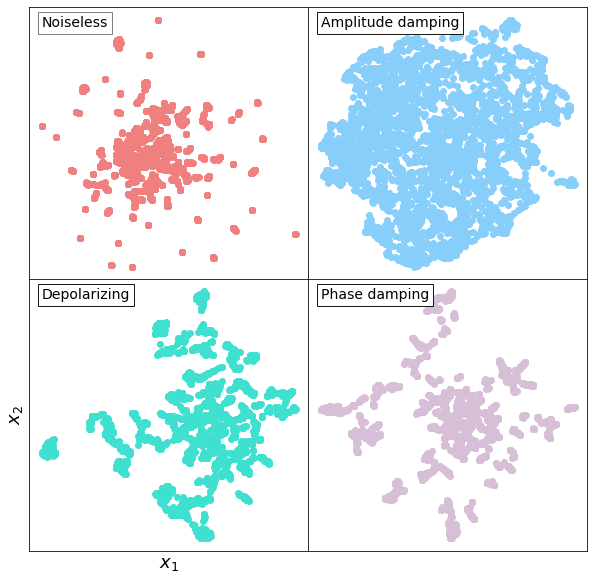

In [13]:
colors = ['lightskyblue', 'lightcoral', 'turquoise', 'thistle', 'lightgreen']
labels = ['Noiseless', 'Amplitude damping', 'Depolarizing', 'Phase damping']

fig, ax = plt.subplots(2,2,figsize=(10, 10))


ln1 = ax[0,0].scatter(embedding_NN_list[1,:,0], embedding_NN_list[1,:,1], color=colors[1])

t1 = ax[0,0].text(0,0.97, "Noiseless",fontsize=14)
t1.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='black'))

###########################################################################################

ax[0,1].scatter(embedding_AD_list[1,:,0], embedding_AD_list[1,:,1], cmap='Spectral', color=colors[0])
t2 = ax[0,1].text(0.0,0.97, "Amplitude damping",fontsize=14)
t2.set_bbox(dict(facecolor='white', alpha=0.9, edgecolor='black'))

ax[1,0].scatter(embedding_DP_list[1,:,0], embedding_DP_list[1,:,1], cmap='Spectral', color=colors[2])
t3 = ax[1,0].text(0,0.97, "Depolarizing",fontsize=14)
t3.set_bbox(dict(facecolor='white', alpha=0.9, edgecolor='black'))

ax[1,1].scatter(embedding_PD_list[1,:,0], embedding_PD_list[1,:,1], cmap='Spectral', color=colors[3])
t4 = ax[1,1].text(0,0.97, "Phase damping",fontsize=14)
t4.set_bbox(dict(facecolor='white', alpha=0.9, edgecolor='black'))
ax[1,0].set_xlabel('$x_1$', fontsize=18)    
ax[1,0].set_ylabel('$x_2$', fontsize=18)  

   
plt.subplots_adjust(wspace=0, hspace=0)
plt.setp(ax, xticks=[], yticks=[])
#plt.savefig('../figures/pauli_space_noise.png', format='png')
plt.show()

## Non-zero coefficients in the Pauli space

In this example we show how the amplitude damping noise apart from mitigating the coefficients in the Pauli space, also introduces new non-zero coefficients. We create an example with the same toy model and visualize the coefficients of the distribution in the Pauli space for the three error models, together with the noiseless circuits.

We see that all the noise models mitigate the non-zero coefficients. However, the shadowed area shows a region where the noiseless simulations gives zero-valued expected values, but the amplitude damping circuit has non-zero expected values for the same operators. For this reason, the noisy circuits with amplitude damping noise fill faster the distribution in the Pauli space than the noiseless circuits.

In [15]:
with open('../results/coefs_noiseless.pickle', 'rb') as f:
    coefs_noiseless = pickle.load(f)
    
with open('../results/coefs_amplitude_damping.pickle', 'rb') as f:
    coefs_amplitude_damping = pickle.load(f)
    
with open('../results/coefs_depolarizing.pickle', 'rb') as f:
    coefs_depolarizing = pickle.load(f)
    
with open('../results/coefs_phase_damping.pickle', 'rb') as f:
    coefs_phase_damping = pickle.load(f)

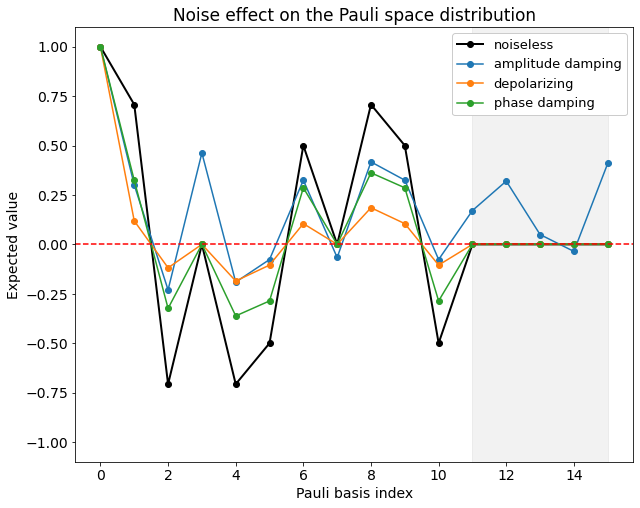

In [16]:
#idx+=2
fig = plt.figure(figsize=(10,8))
plt.plot(coefs_noiseless, linewidth=2, marker='o', color='black', label='noiseless')
plt.plot(coefs_amplitude_damping, marker='o', label='amplitude damping')
plt.plot(coefs_depolarizing, marker='o', label='depolarizing')
plt.plot(coefs_phase_damping, marker='o', label='phase damping')
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.xlabel('Pauli basis index', fontsize=14)
plt.ylabel('Expected value', fontsize=14)
plt.title('Noise effect on the Pauli space distribution', fontsize=17)
plt.legend(fontsize=13, framealpha=1)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.fill_between([11,15],[-1.1,-1.1], [1.1,1.1], alpha=0.1, color='gray')
plt.ylim(-1.1,1.1)
#plt.savefig('../figures/noise_effect.png', format='png')
plt.show()